In [2]:
pip install NLTK

Note: you may need to restart the kernel to use updated packages.


In [11]:
import nltk

In [12]:
import urllib.request

In [13]:
## grab the webpage relating to AFC 
response = urllib.request.urlopen('https://en.wikipedia.org/wiki/Arsenal_F.C.')
html = response.read()
print(html)

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Arsenal F.C. - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"bdde0fa6-3bff-4888-a82f-675f848cc51f","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Arsenal_F.C.","wgTitle":"Arsenal F.C.","wgCurRevisionId":981008937,"wgRevisionId":981008937,"wgArticleId":2174,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1: Julian\xe2\x80\x93Gregorian uncertainty","Wikipedia indefinitely semi-protected pages","Use dmy dates from December 2019","Use British English from May 2013","Arti

In [18]:
# Import beautiful soup to clean the webpage 

from bs4 import BeautifulSoup

#get a text file of the webpage contents


soup = BeautifulSoup(html, features="html.parser")

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# get text
text = soup.get_text()

# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in text.splitlines())
# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# drop blank lines
text = '\n'.join(chunk for chunk in chunks if chunk)

print(text)



Arsenal F.C. - Wikipedia
Arsenal F.C.
From Wikipedia, the free encyclopedia
Jump to navigation
Jump to search
This article is about the men's football club based in England. For the women's team, see Arsenal W.F.C. For other teams called Arsenal, see Arsenal (disambiguation) ¬ß¬†Association football.
Association football club based in Islington, London, England
ArsenalFull nameArsenal Football ClubNickname(s)The GunnersFoundedOctober¬†1886; 134¬†years ago¬†(1886-10) as Dial Square[1]GroundEmirates StadiumCapacity60,704[2]OwnerKroenke Sports & EntertainmentManagerMikel ArtetaLeaguePremier League2019‚Äì20Premier League, 8th of 20WebsiteClub website
Home colours
Away colours
Third colours
Current season
Arsenal Football Club is a professional football club based in Islington, London, England, that plays in the Premier League, the top flight of English football. The club has won 13 league titles (including one unbeaten title), a record 14 FA Cups, two League Cups, 16 FA Community Shields, 

In [19]:
## get tokens of the text
tokens = [t for t in text.split()]
print(tokens)

['Arsenal', 'F.C.', '-', 'Wikipedia', 'Arsenal', 'F.C.', 'From', 'Wikipedia,', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'This', 'article', 'is', 'about', 'the', "men's", 'football', 'club', 'based', 'in', 'England.', 'For', 'the', "women's", 'team,', 'see', 'Arsenal', 'W.F.C.', 'For', 'other', 'teams', 'called', 'Arsenal,', 'see', 'Arsenal', '(disambiguation)', '¬ß', 'Association', 'football.', 'Association', 'football', 'club', 'based', 'in', 'Islington,', 'London,', 'England', 'ArsenalFull', 'nameArsenal', 'Football', 'ClubNickname(s)The', 'GunnersFoundedOctober', '1886;', '134', 'years', 'ago', '(1886-10)', 'as', 'Dial', 'Square[1]GroundEmirates', 'StadiumCapacity60,704[2]OwnerKroenke', 'Sports', '&', 'EntertainmentManagerMikel', 'ArtetaLeaguePremier', 'League2019‚Äì20Premier', 'League,', '8th', 'of', '20WebsiteClub', 'website', 'Home', 'colours', 'Away', 'colours', 'Third', 'colours', 'Current', 'season', 'Arsenal', 'Football', 'Club', 'is'

In [20]:
# import stopwords library 
from nltk.corpus import stopwords

Arsenal:310
F.C.:70
-:4
Wikipedia:3
From:5
Wikipedia,:1
free:1
encyclopedia:1
Jump:2
navigation:1
search:1
This:17
article:3
men's:3
football:51
club:84
based:3
England.:1
For:11
women's:5
team,:1
see:8
W.F.C.:3
teams:7
called:1
Arsenal,:10
(disambiguation):1
¬ß:7
Association:6
football.:3
Islington,:3
London,:5
England:8
ArsenalFull:1
nameArsenal:1
Football:49
ClubNickname(s)The:1
GunnersFoundedOctober:1
1886;:1
134:1
years:13
ago:4
(1886-10):1
Dial:6
Square[1]GroundEmirates:1
StadiumCapacity60,704[2]OwnerKroenke:1
Sports:8
&:42
EntertainmentManagerMikel:1
ArtetaLeaguePremier:1
League2019‚Äì20Premier:1
League,:10
8th:1
20WebsiteClub:1
website:2
Home:2
colours:8
Away:2
Third:2
Current:2
season:26
Club:12
professional:3
England,:2
plays:1
Premier:27
top:10
flight:5
English:30
The:177
13:13
league:16
titles:2
(including:1
one:16
unbeaten:5
title),:1
record:24
14:11
FA:59
Cups,:8
two:11
League:70
16:9
Community:3
Shields,:1
Centenary:3
Trophy,:2
European:9
Cup:83
Winners':7
Cup,:8
Inter-C

upgrading:1
field.:1
continued:1
play:9
twenty:1
(with:1
exceptions:1
1894‚Äì95:1
season),:1
north:1
1913.[115][116]:1
Widely:1
referred:4
September:55
1913:1
2006.:7
stadium:14
designed:1
renowned:1
architect:1
Archibald:1
Leitch,:1
common:1
grounds:2
UK:2
covered:1
stand:1
open-air:1
banks:1
terracing.[31]:1
entire:1
given:5
massive:1
1930s::1
West:11
constructed,:1
opening:1
1932:1
respectively,:1
roof:1
terrace,:1
bombed:1
restored:1
1954.[31]:1
hold:7
60,000:1
spectators:1
peak,:1
capacity:3
57,000:1
1990s.:1
Taylor:1
Report:4
regulations:1
obliged:1
convert:1
all-seater:1
1993‚Äì94:3
thus:1
reducing:1
38,419:1
seated:1
spectators.[117]:1
accommodate:1
additional:2
advertising:1
boards,:1
seasons,:1
1998:3
2000,:1
Wembley,:1
house:1
70,000:1
spectators.[118]:1
Stand,:2
Expansion:1
restricted:1
designated:1
Grade:1
listed:5
building:2
residential:1
properties.[31]:1
limitations:1
prevented:1
maximising:1
matchday:2
revenue:5
1990s:1
21st:1
century,:2
putting:1
danger:1
behind:2
boo

Carlos:1
Cuesta[204]:1
Andreas:1
Georgson[204]:1
Miguel:1
Molina[204]:1
Goalkeeping:1
I√±aki:1
Ca√±a:1
Pavon[203]:1
Per:1
Mertesacker[205]:1
Bould[206]:1
Head:1
performance:5
Shad:1
Forsythe[207]:1
Medical:1
director:1
Gary:1
O'Driscoll[208]:1
2020.[209][210]:1
Director:5
Lord:1
Harris:1
Peckham[211]:1
Kroenke[211]:2
Josh:2
Tim:2
Lewis[212]:1
Executive:1
Officer:1
Vinai:1
Venkatesham[213]:1
Contract:1
Negotiator:1
Huss:1
Fahmy[214]:1
Technical:1
Edu[215]:1
Championsand:1
TimelineThis:1
box::1
viewtalkedit1880:1
‚Äî‚Äì1890:1
‚Äî‚Äì1900:1
‚Äî‚Äì1910:1
‚Äî‚Äì1920:1
‚Äî‚Äì1930:1
‚Äî‚Äì1940:1
‚Äî‚Äì1950:1
‚Äî‚Äì1960:1
‚Äî‚Äì1970:1
‚Äî‚Äì1980:1
‚Äî‚Äì1990:1
‚Äî‚Äì2000:1
‚Äî‚Äì2010:1
‚Äî‚Äì2020:1
‚ÄîOutside:1
FLSecond:1
tier:1
WWIWWII:1
üîµ:14
üî¥:14
Championsüî¥:1
Winners:8
silverware:1
1890.:1
Junior:2
reserves,:1
weeks:1
Cup.[216][217]:1
senior:1
honour:1
1930,:2
Cup.[218]:1
enjoyed:1
titles.[219][220]:1
cup:3
1970‚Äì71:1
feat,:1
2001‚Äì02,:3
well:1
1992‚Äì93.[221]:1
Seasons:4
bold:1
Do

U18:2
Youth:1
Kempster,:1
Tony.:1
"Attendances:1
2007/08".:1
"All:1
Time:4
Attendance:4
Records".:4
nufc.com.:1
NUFC.:1
Please:1
note:1
figures:1
source:1
estimates:1
entirely:1
accurate.:1
"German:1
Bundesliga:1
Stats::3
2010‚Äì11".:3
ESPNsoccernet.:3
"Camp:1
Nou:1
2.7%".:1
Barcelona.:1
"Barclays:1
"Spanish:1
La:1
Liga:1
"Fans:2
2006/2007":1
(Word:1
document).:1
O'Connor,:1
Ashling.:1
"Liverpool:1
lag:1
fight:1
supremacy:1
TV:2
row:1
grows".:1
Coggin,:1
Stewart.:1
derby".:1
Classic::1
Arsenal-Manchester:1
Utd".:1
FIFA.:1
Uncovered":1
Census.:1
"Football:2
2008".:1
New:2
Pools.:1
Board".:2
Scott,:1
Allen,:2
Katie:1
"Takeover:1
gains:1
pace:1
9.9%:1
sale".:1
"Russian:1
buys:1
Dein's:1
stake".:1
News.:3
"Everton:1
confirm:1
sale:1
49.9%:1
Moshiri".:1
"Kroenke:2
increases:1
Holdings".:1
nears:1
threshold".:1
"US:1
businessman:1
agrees:1
buy:1
"Stan:1
takes:1
controlling:1
62.89%:1
shares".:1
https://www.standard.co.uk/sport/football/arsenal-majority-shareholder-stan-kroenke-increases-stak

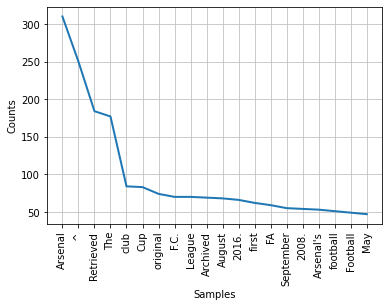

In [21]:
# Remove stop words and count word frequencies
sr = stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)